Importing the Required Libraries

In [54]:
import pandas as pd
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from collections import defaultdict
import csv
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from string import punctuation
import re
import math
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from ast import literal_eval
import sys 
import matplotlib.pyplot as plt

def strip_html(data):
  p = re.compile(r'<.*?>')
  return p.sub('', data)
 
def tokenize(text):
  return nltk.word_tokenize(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vatsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vatsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vatsa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vatsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Importing The Dataset

In [0]:
from google.colab import files
uploaded = files.upload()


Saving occupation_code_descriptions.csv to occupation_code_descriptions (1).csv
Saving ooh_data_export.csv to ooh_data_export (1).csv
Saving tools_technology.csv to tools_technology (1).csv


Converting the files read into the system to pandas data frame

In [55]:
df = pd.read_csv('occupation_code_descriptions.csv')
df1 = pd.read_csv('ooh_data_export.csv')
df2 = pd.read_csv('tools_technology.csv')

Merging df and df1

In [56]:
dfmerge1 = df.merge(df1,how='left', left_on='O*NET-SOC Code', right_on='soc_code')

Removing multiple entries of same id (O*NET-SOC Code)

In [57]:
df2 = df2.groupby(['O*NET-SOC Code'])['Tool Name'].apply(', '.join)

In [58]:
df2.head(2)

O*NET-SOC Code
11-1011.00    10-key calculators, Desktop computers, Laptop computers, Personal computers, Personal digital assistants PDA, Smartphones, Universal serial bus USB flash drives, Adobe Systems Adobe Acrobat, AdSense Tracker, Atlassian JIRA, Blackbaud The Raiser's Edge, ComputerEase Construction Accounting, Database reporting software, Databox, Email software, Enterprise resource planning ERP software, Exact Software Macola ES Labor Performance, Extensible markup language XML, Fund accounting software, Graphic presentation software, Halogen e360, Halogen ePraisal, HCSS HeavyBid, HCSS HeavyJob, Human resource information system HRIS, Infor SSA Human Capital Management, Intuit QuickBooks, Listserv software, Lyris HQ Web-Analytics Solution, Microsoft Access, Microsoft Dynamics AX, Microsoft Dynamics GP, Microsoft Excel, Microsoft FRx, Microsoft Office, Microsoft Outlook, Microsoft PowerPoint, Microsoft Project, Microsoft Publisher, Microsoft SharePoint, Microsoft Word, Nedstat 

In [59]:
df2 = df2.to_frame().reset_index()

Merging al the datasets into dfmerge2

In [60]:
dfmerge2 = dfmerge1.merge(df2, how = 'left' ,on='O*NET-SOC Code')

In [61]:
dfmerge2 = dfmerge2.drop(columns =['title','soc_code'])

In [62]:
dfmerge2.head(2)

,O*NET-SOC Code,Title,Description,summary_what_they_do,summary_how_to_become_one,Tool Name
0,11-1011.00,Chief Executives,"Determine and formulate policies and provide overall direction of companies or private and public sector organizations within guidelines set up by a board of directors or similar governing body. Plan, direct, or coordinate operational activities at the highest level of management with the help of subordinate executives and staff managers.",NaN,NaN,"10-key calculators, Desktop computers, Laptop computers, Personal computers, Personal digital assistants PDA, Smartphones, Universal serial bus USB flash drives, Adobe Systems Adobe Acrobat, AdSense Tracker, Atlassian JIRA, Blackbaud The Raiser's Edge, ComputerEase Construction Accounting, Database reporting software, Databox, Email software, Enterprise resource planning ERP software, Exact Software Macola ES Labor Performance, Extensible markup language XML, Fund accounting software, Graphic presentation software, Halogen e360, Halogen ePraisal, HCSS HeavyBid, HCSS HeavyJob, Human resource information system HRIS, Infor SSA Human Capital Management, Intuit QuickBooks, Listserv software, Lyris HQ Web-Analytics Solution, Microsoft Access, Microsoft Dynamics AX, Microsoft Dynamics GP, Microsoft Excel, Microsoft FRx, Microsoft Office, Microsoft Outlook, Microsoft PowerPoint, Microsoft Project, Microsoft Publisher, Microsoft SharePoint, Microsoft Word, Nedstat Sitestat, Norchard Solutions Succession Wizard, Online advertising reporting software, Oracle E-Business Suite, Oracle PeopleSoft, Oracle Siebel Server Sync, PHP: Hypertext Preprocessor, Relational database management software, Sage 50 Accounting, SAP, Structured query language SQL, Web browser software"
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, shareholders, customers, and employees to address sustainability issues. Enact or oversee a corporate sustainability strategy.",NaN,NaN,"10-key calculators, Computer data input scanners, Desktop computers, Handheld computers, Laptop computers, Multi-line telephone systems, Personal computers, Photocopying equipment, Smartphones, Video teleconferencing systems, Email software, Microsoft Access, Microsoft Dynamics GP, Microsoft Excel, Microsoft Office, Microsoft PowerPoint, Microsoft Project, Microsoft Word, SAP, Scheduling software, Teleconferencing software, Web browser software"


In [63]:
dfmerge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 0 to 1109
Data columns (total 6 columns):
O*NET-SOC Code               1110 non-null object
Title                        1110 non-null object
Description                  1110 non-null object
summary_what_they_do         384 non-null object
summary_how_to_become_one    384 non-null object
Tool Name                    974 non-null object
dtypes: object(6)
memory usage: 60.7+ KB


Converting the text columns into string type

In [64]:
dfmerge2['summary_what_they_do'] = dfmerge2['summary_what_they_do'].astype(str)
dfmerge2['Title'] = dfmerge2['Title'].astype(str)
dfmerge2['Description'] = dfmerge2['Description'].astype(str)
dfmerge2['summary_how_to_become_one'] = dfmerge2['summary_how_to_become_one'].astype(str)
dfmerge2['Tool Name'] = dfmerge2['Tool Name'].astype(str)

Removing top 10 words from summary_what_they_do, this will remove the uneccesary words present in the context of summary_what_they_do.
**Note: Though we will be removing the top words occuring in nearly all the columns by using max_df in tfidfvectorizer, since summary_what_they_do is not present for each and every key value, commonly occuring words in it will not be removed by max_df**

In [65]:
freq = pd.Series(' '.join(dfmerge2['summary_what_they_do']).split()).value_counts()[:10]
freq = list(freq.index)
dfmerge2['summary_what_they_do'] = dfmerge2['summary_what_they_do'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [66]:
freq

['and', 'nan', '</h4>', '<h4>What', 'Do', 'to', 'the', 'of', 'or', 'They']

Similarly removing the top 10 high frequency words from summary_how_to_become_one

In [67]:
freq = pd.Series(' '.join(dfmerge2['summary_how_to_become_one']).split()).value_counts()[:10]
freq = list(freq.index)
dfmerge2['summary_how_to_become_one'] = dfmerge2['summary_how_to_become_one'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

Removing top 5 words occuring in tools names, this will remove microsoft and other company names repeating over aand over like in microsoft excel, microsoft word, so on and so forth.


In [68]:
freq = pd.Series(' '.join(dfmerge2['Tool Name']).split()).value_counts()[:5]
freq = list(freq.index)
dfmerge2['Tool Name'] = dfmerge2['Tool Name'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dfmerge2['Tool Name'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [69]:
freq

['Microsoft', 'software,', 'computers,', 'Adobe', 'equipment,']

**Note: Here top 5 words were removed from the Tools Name variable since it seemed to contain several repeating unnecessary terms in them. 5 was selected randomly, we can look at top 100 words and drop n words based on how many of them we find unnecessary. For that just change '5' to '100' in the code and freq will give you the top 100 words.**

Making a list of tokens of combined text of all the text columns

In [70]:
token1 = []
for i in range(len(dfmerge2['summary_what_they_do'])):
  token1.append(tokenize(2*(strip_html(dfmerge2['summary_what_they_do'].iloc[i]) + (' ')) + strip_html(dfmerge2['summary_how_to_become_one'].iloc[i]) + (' ') + 5*(dfmerge2['Title'].iloc[i] + (' ')) + 3*(dfmerge2['Description'].iloc[i] + (' ')) + 2*(dfmerge2['Tool Name'].iloc[i]+ (' '))))

**Note: In the tokenization procedure described above, text columns were multiplied by the numbers to repeat those words more number of times, as the number of words increases automatically more weightage will be given to those words**

***Note: In this case, highest weight was given to the title since similar job profiles have similar titles ( atleast in cases when we have job availabilites (for example, data scientist job posted by different companies will nearly have the same titles) . Big question is how to optimize these weights! One way is to send our users similar job profiles and ask them to rank them in 0 to 5 based on how relevant are those recommended jobs to them. The highest average votes obtained by the particular values of weight can be considered as the best one. These rankings can further be used along with collabrative filtering learning algorithm to generate recommendations which can be further used to develop collabarative and content based hybrid recommendation system.***

**How to make users rank for us! Buy a service of some ATS (like Workday), it will give us ability to evaluate the resume of a person exactly how a company using workday as its ATS will evaluate the profile of that person, finally we can send them free resume evaluation based on the ATS output if they rank for us. This system is being followed by a few companies. In other case, we can just ask them for a favor in order to better suggest them new openings.**

Assigning combined tokens to dfmerge2

In [71]:
dfmerge2["Tokens"] = pd.Series(token1)

Adding some stop words to the standard stopwords library

In [72]:
# Remove stop words
others   = ["'d", "co", "ed", "put", "say", "get", "can", "become",\
                    "los", "sta", "la", "use", "iii", "else", "could", \
                    "would", "come", "take", "...", ".."]
pronouns = ['us']
stop = stopwords.words('english') + list(punctuation) + others + pronouns

Converting text into lower case

In [73]:
dfmerge2["Tokens"] = dfmerge2["Tokens"].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [75]:
dfmerge2["Tokens"][:2]

0                                                                                               [chief, executives, chief, executives, chief, executives, chief, executives, chief, executives, determine, and, formulate, policies, and, provide, overall, direction, of, companies, or, private, and, public, sector, organizations, within, guidelines, set, up, by, a, board, of, directors, or, similar, governing, body, ., plan, ,, direct, ,, or, coordinate, operational, activities, at, the, highest, level, of, management, with, the, help, of, subordinate, executives, and, staff, managers, ., determine, and, formulate, policies, and, provide, overall, direction, of, companies, or, private, and, public, sector, organizations, within, guidelines, set, up, by, a, board, of, directors, or, similar, governing, body, ., plan, ,, direct, ,, or, coordinate, ...]
1    [chief, sustainability, officers, chief, sustainability, officers, chief, sustainability, officers, chief, sustainability, officers, chie

Calling tfidfvectorizer of skicit learn with word as the pre processor and ngram of (1,2)

In [76]:
tfidf = TfidfVectorizer(analyzer='word',ngram_range= (1,2),min_df=0, stop_words=stop)

In [77]:
dfmerge2["Tokens"] = dfmerge2["Tokens"].apply(lambda x: ' '.join(x))

Useful Information which I  always extract before finally going for Tf-Idf

A) Word Count of each and every row

In [78]:
dfmerge2["WordCount"] = dfmerge2["Tokens"].apply(lambda x: len(str(x).split(" ")))

B) Character count of each and every row

In [79]:
dfmerge2['CharCount'] = dfmerge2["Tokens"].str.len() ## this also includes spaces

C) Number of Stop Words present in every row

In [80]:
dfmerge2['StopWords'] = dfmerge2["Tokens"].apply(lambda x: len([x for x in x.split() if x in stop]))

D) Number of Upper Case Words (They are always the ones carrying more weightage)

In [81]:
dfmerge2['upper'] = dfmerge2["Tokens"].apply(lambda x: len([x for x in x.split() if x.isupper()]))

E) Number of Numerics ( They can signify a lot of things)

In [82]:
dfmerge2['numerics'] = dfmerge2["Tokens"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

Developing Tf_Idf Matrix

In [83]:
# tf matrix is (n_reviews)x(m_terms)
tfidf_matrix = tfidf.fit_transform(dfmerge2["Tokens"])

Performing Cosine Similarity

In [84]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [85]:
dfmerge2 = dfmerge2.reset_index()

In [86]:
titles = dfmerge2["Title"]
indices = pd.Series(dfmerge2.index, index=df["Title"])

Developing a function to extract top recommendations from the system

In [87]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    job_indices = [i[0] for i in sim_scores]
    return titles.iloc[job_indices]

In [88]:
get_recommendations('Chief Executives').head(5)

6                           Marketing Managers
27                    Human Resources Managers
12                  Treasurers and Controllers
2              General and Operations Managers
13    Financial Managers, Branch or Department
Name: Title, dtype: object

In [89]:
get_recommendations('Accountants and Auditors').head(5)

101                                        Auditors
699    Bookkeeping, Accounting, and Auditing Clerks
110                             Financial Examiners
100                                     Accountants
704                     Financial Clerks, All Other
Name: Title, dtype: object

In [90]:
get_recommendations('Bookkeeping, Accounting, and Auditing Clerks').head(5)

100                                                            Accountants
101                                                               Auditors
691    First-Line Supervisors of Office and Administrative Support Workers
12                                              Treasurers and Controllers
13                                Financial Managers, Branch or Department
Name: Title, dtype: object

In [91]:
get_recommendations('Teacher Assistants').head(5)

383                      Special Education Teachers, Secondary School
382                         Special Education Teachers, Middle School
381    Special Education Teachers, Kindergarten and Elementary School
380                             Special Education Teachers, Preschool
374                   Kindergarten Teachers, Except Special Education
Name: Title, dtype: object

In [92]:
get_recommendations('Software Developers, Applications').head(5)

127    Software Developers, Systems Software
125                     Computer Programmers
122                Computer Systems Analysts
137    Computer Systems Engineers/Architects
86                       Management Analysts
Name: Title, dtype: object

Recommendation System With LDA

In [93]:


class GeneralizedTextProcessing(object):  
    def __init__(self, synonymdict=None, StopWordList=None, pos_bin=True, stem_bin=True):
        if synonymdict!=None and type(synonymdict) != dict:
            raise RuntimeError("\n"+\
                "***Invalid GeneralizedTextProcessing Initialization.\n"+\
                "***synonym dictionary is invalid")
            sys.exit()
        if StopWordList!=None and type(StopWordList) != list:
            raise RuntimeError("\n"+\
                "***Invalid GeneralizedTextProcessing Initialization.\n"+\
                "***stop word list is invalid")
            sys.exit()
        if pos_bin!=True and pos_bin!=False:
            raise RuntimeError("\n"+\
                "***Invalid GeneralizedTextProcessing Initialization.\n"+\
                "***POS is not True or False")
            sys.exit()
        if stem_bin!=True and stem_bin!=False:
            raise RuntimeError("\n"+\
                "***Invalid GeneralizedTextProcessing Initialization.\n"+\
                "***STEM is not True or False")
            sys.exit()
        if synonymdict==None:
            self.synonymdict_ = {}
        else:
            self.synonymdict_ = synonymdict
        if StopWordList==None:
            self.StopWordList_ = []
        else:
            self.StopWordList_ = StopWordList
        self.pos_  = pos_bin
        self.stem_ = stem_bin

    # Further Customization of Stopping and Stemming using NLTK
    def preprocessor(s):
        # Preprocess String s
        s = s.lower()
        # Replace special characters with spaces
        s = s.replace('-', ' ')
        s = s.replace('_', ' ')
        s = s.replace(',', '. ')
        # Replace not contraction with not
        s = s.replace("'nt", " not")
        s = s.replace("n't", " not")
        return(s)
        
    # Customized NLP Processing
    def my_analyzer(self, s):
        # Synonym List - Map Keys to Values
        syns = { \
                  'wont':'would not', \
                  'cant':'can not', 'cannot':'can not', \
                  'couldnt':'could not', \
                  'shouldnt':'should not', \
                  'wouldnt':'would not'}
        syns.update(self.synonymdict_)
        
        # Preprocess String s
        s = GeneralizedTextProcessing.preprocessor(s)
    
        # Tokenize 
        tokens = word_tokenize(s)
        #tokens = [word.replace(',','') for word in tokens ]
        tokens = [word for word in tokens if ('*' not in word) and \
                  ("''" != word) and ("``" != word) and \
                  (word!='description') and (word !='dtype') \
                  and (word != 'object') and (word!="'s")]
        
        # Map synonymdict
        for i in range(len(tokens)):
            if tokens[i] in syns:
                tokens[i] = syns[tokens[i]]
                
        # Remove stop words
        punctuation = list(string.punctuation)+['..', '...']
        pronouns = ['us']
        others   = ["'d", "co", "ed", "put", "say", "get", "can", "become",\
                    "los", "sta", "la", "use", "iii", "else", "could", \
                    "would", "come", "take"]
        stop = stopwords.words('english') + \
                punctuation + pronouns + others + self.StopWordList_
        filtered_terms = [word for word in tokens if (word not in stop) and \
                      (len(word)>1) and (not word.replace('.','',1).isnumeric()) \
                      and (not word.replace("'",'',2).isnumeric())]
        
        # Lemmatization & Stemming - Stemming with WordNet POS
        # Since lemmatization requires POS need to set POS
        if self.pos_ == True:
            tagged_tokens = pos_tag(filtered_terms, lang='eng')
        else:
            tagged_tokens = filtered_terms
        # Stemming with for terms without WordNet POS
        if self.stem_ == True:
            stemmer = SnowballStemmer("english")
            wn_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
            wnl = WordNetLemmatizer()
            stemmed_tokens = []
            for tagged_token in tagged_tokens:
                term = tagged_token[0]
                pos  = tagged_token[1]
                pos  = pos[0]
                try:
                    pos   = wn_tags[pos]
                    z = wnl.lemmatize(term, pos=pos)
                    if z not in stop:
                        stemmed_tokens.append(z)
                except:
                    z = stemmer.stem(term)
                    if z not in stop:
                        stemmed_tokens.append(z)
        else:
            stemmed_tokens = tagged_tokens
        return stemmed_tokens
    
    def display_topics(lda, terms, n_terms=15, \
                       word_cloud=False, mask=None):
        for topic_idx, topic in enumerate(lda):
            message  = "Topic #%d: " %(topic_idx+1)
            print(message)
            abs_topic = abs(topic)
            topic_terms_sorted = \
                    [[terms[i], topic[i]] \
                         for i in abs_topic.argsort()[:-n_terms - 1:-1]]
            k = 5
            n = int(n_terms/k)
            m = n_terms - k*n
            for j in range(n):
                l = k*j
                message = ''
                for i in range(k):
                    if topic_terms_sorted[i+l][1]>0:
                        word = "+"+topic_terms_sorted[i+l][0]
                    else:
                        word = "-"+topic_terms_sorted[i+l][0]
                    message += '{:<15s}'.format(word)
                print(message)
            if m> 0:
                l = k*n
                message = ''
                for i in range(m):
                    if topic_terms_sorted[i+l][1]>0:
                        word = "+"+topic_terms_sorted[i+l][0]
                    else:
                        word = "-"+topic_terms_sorted[i+l][0]
                    message += '{:<15s}'.format(word)
                print(message)
            print("")
            if word_cloud:
                topic_cloud = {}
                for i in range(n_terms):
                    topic_cloud[topic_terms_sorted[i][0]] = \
                                topic_terms_sorted[i][1]
                # Show Word Cloanaud based dictionary with term Frequencies
                GeneralizedTextProcessing.word_cloud_dic(topic_cloud)
        return

    
    def shades_of_grey(word, font_size, position, orientation, \
                       random_state=None, **kwargs):
        return "hsl(0, 0%%, %d%%)" % random.randint(60,1000)
    
    def word_cloud_string(s, mask=None, bg_color="black", \
                          stopwords=None, max_words=30):
        wcloud = WordCloud(background_color=bg_color,   \
               mask=mask, max_words=max_words, stopwords=stopwords, \
               max_font_size=40,  prefer_horizontal=0.9,  \
               min_font_size=10, relative_scaling=0.5,    \
               width=400, height=200, scale=1, margin=10, random_state=12345)
        # Show Word Cloud based term Frequencies (unweighted)
        wcloud.generate(s)
        plt.imshow( \
        wcloud.recolor(color_func=GeneralizedTextProcessing.shades_of_grey, \
                       random_state=12345), interpolation="bilinear")
        plt.axis("off")
        plt.figure()
        plt.show()
        return
    
    def word_cloud_dic(td, mask=None, bg_color="black", max_words=30):
        wcloud = WordCloud(background_color=bg_color,   \
               mask=mask, max_words=max_words, \
               max_font_size=40,  prefer_horizontal=0.9,  \
               min_font_size=10, relative_scaling=0.5,    \
               width=400, height=200, scale=1, margin=10, \
               random_state=12345)
        # Show Word Cloud based term Frequencies (unweighted)
        wcloud.generate_from_frequencies(td)
        plt.imshow( \
                   wcloud.recolor(color_func=GeneralizedTextProcessing.shades_of_grey, \
                            random_state=12345), interpolation="bilinear")
        plt.axis("off")
        plt.figure()
        plt.show()
        return
    
    
    # Converts a Term-Frequency matrix into a dictionary
    # tf is a sparse term-frequency matrix
    # terms is a list of term names (strings)
    # Returns dictionary where the terms are keys and value frequencies
    def term_dic(tf, terms, scores=None):
        td   = {}
        for i in range(tf.shape[0]):
            # Iterate over the terms with nonzero scores
            term_list = tf[i].nonzero()[1]
            if len(term_list)>0:
                if scores==None:
                    for t in np.nditer(term_list):
                        if td.get(terms[t]) == None:
                            td[terms[t]] = tf[i,t]
                        else:
                            td[terms[t]] += tf[i,t]
                else:
                    for t in np.nditer(term_list):
                        score = scores.get(terms[t])
                        if score != None:
                            # Found Sentiment Word
                            score_weight = abs(scores[terms[t]])
                            if td.get(terms[t]) == None:
                                td[terms[t]] = tf[i,t]  * score_weight
                            else:
                                td[terms[t]] += tf[i,t] * score_weight
        return td

Text Analytics Module developed for customized preprocessing and 

In [94]:

# Class for reading and displaying topics and word clouds
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
# Classes for Text Preprocessing
import string
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
# sklearn methods for Preparing the Term-Doc Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
 #sklearn methods for Extracting Topics using the Term-Doc Matrix
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud, STOPWORDS
import random

Better Readability is important

In [95]:

# Increase column width to let pandas read large text columns
pd.set_option('max_colwidth', 32000)


Necessary definations

In [96]:


# Setup program constants and reviews
n_tokens = len(dfmerge2['Tokens'])
s_words = 'english'
ngram = (1,2)
tokens = dfmerge2['Tokens']

Conversion to TfIDF, using (AdvancedAnalytics) one of my seperate library [developed in collabration with my professor] in backend.

In [97]:

# Constants
m_features = None # default is None
n_topics = 8 # number of topics
max_iter = 10 # maximum number of iterations
max_df = 0.9 # max proportion of docs/reviews allowed for a term
min_df = 1
learning_offset = 10. # default is 10
learning_method = 'online' # alternative is 'batch' for large files
tf_matrix='tfidf'

# Create the Review by Term Frequency Matrix using Custom Analyzer
# max_df is a limit for terms. If a term has more than this
# proportion of documents then that term is dropped. Use max_df=1.0
# to eliminate this behavior. Typical values are max_df between 0.5 and 0.95
ta = GeneralizedTextProcessing()
cv = CountVectorizer(max_df=max_df, min_df=1, max_features=m_features,\
analyzer=ta.my_analyzer)
tf = cv.fit_transform(tokens)
terms = cv.get_feature_names()
print('{:.<22s}{:>6d}'.format("Number of Reviews", len(tokens)))
print('{:.<22s}{:>6d}'.format("Number of Terms", len(terms)))

term_sums = tf.sum(axis=0)
term_counts = []
for i in range(len(terms)):
    term_counts.append([terms[i], term_sums[0,i]])
def sortSecond(e):
    return e[1]
term_counts.sort(key=sortSecond, reverse=True)
print("\nTerms with Highest Frequency:")
for i in range(10):
    print('{:<15s}{:>5d}'.format(term_counts[i][0], term_counts[i][1]))
    

# Construct the TF/IDF matrix from the Term Frequency matrix
print("\nConstructing Term/Frequency Matrix using TF-IDF")
# Default for norm is 'l2', use norm=None to supress
tfidf_vect = TfidfTransformer(norm=None, use_idf=True) #set norm=None
# tf matrix is (n_reviews)x(m_terms)
tf = tfidf_vect.fit_transform(tf)    

Number of Reviews.....  1110
Number of Terms....... 17378

Terms with Highest Frequency:
system          8059
machine         3643
software        3116
digital         2534
management      2180
computer        1971
data            1941
word            1937
office          1783
personal        1767

Constructing Term/Frequency Matrix using TF-IDF


Applying LDA and developing word clouds, note only 8 topics and 15 terms are used to develop the results, these are just random numbers and should be modified (increased) as per requirement.


********** GENERATED TOPICS **********
Topic #1: 
+laboratory    +microscope    +analyzer      +system        +food          
+meter         +spectrometer  +ray           +test          +chemical      
+technician    +detector      +gas           +image         +furnace       



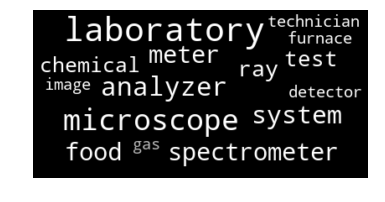

<Figure size 432x288 with 0 Axes>

Topic #2: 
+worker        +sale          +system        +financial     +service       
+oracle        +management    +clerk         +business      +manager       
+customer      +activity      +accounting    +software      +ibm           



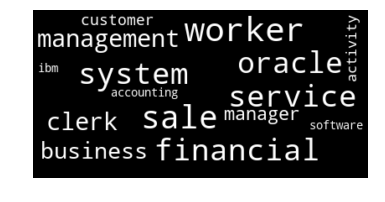

<Figure size 432x288 with 0 Axes>

Topic #3: 
+language      +oracle        +apache        +system        +server        
+ibm           +network       +markup        +sql           +computer      
+enterprise    +design        +hypertext     +business      +visual        



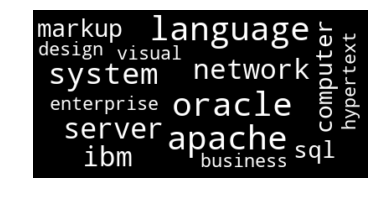

<Figure size 432x288 with 0 Axes>

Topic #4: 
+system        +projector     +digital       +teacher       +teach         
+video         +microphone    +television    +camera        +computer      
+player        +printer       +telephone     +mail          +transportation



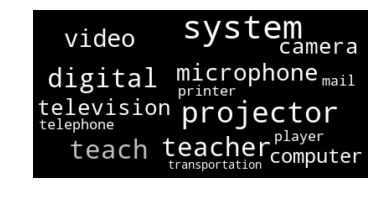

<Figure size 432x288 with 0 Axes>

Topic #5: 
+system        +fire          +pilot         +esri          +global        
+positioning   +water         +land          +gps           +emergency     
+driver        +soil          +flight        +scientific    +group         



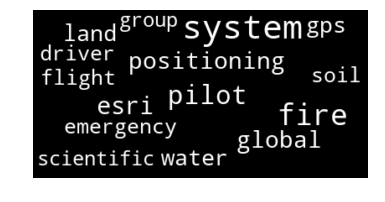

<Figure size 432x288 with 0 Axes>

Topic #6: 
+medical       +patient       +surgical      +blood         +forceps       
+emr           +health        +practice      +care          +system        
+healthcare    +catheter      +nurse         +physician     +therapist     



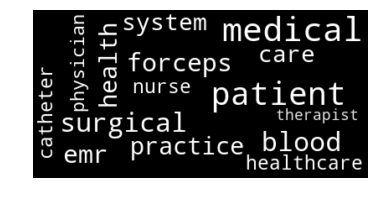

<Figure size 432x288 with 0 Axes>

Topic #7: 
+wrench        +plier         +gauge         +metal         +tool          
+machine       +tester        +wire          +weld          +plastic       
+screwdriver   +cut           +drill         +set           +press         



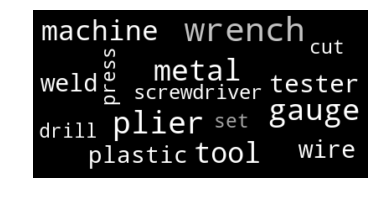

<Figure size 432x288 with 0 Axes>

Topic #8: 
+dental        +machine       +operator      +power         +truck         
+hand          +material      +gun           +worker        +brush         
+hammer        +cutter        +wrench        +saw           +knife         



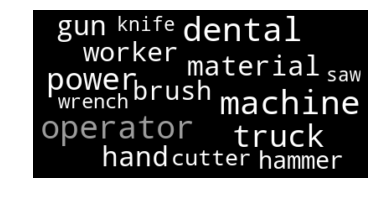

<Figure size 432x288 with 0 Axes>

In [98]:
   
uv = LatentDirichletAllocation(n_components=n_topics, max_iter=max_iter,\
learning_method=learning_method, \
learning_offset=learning_offset, \
random_state=12345)
U = uv.fit_transform(tf)
# Display the topic selections
print("\n********** GENERATED TOPICS **********")
GeneralizedTextProcessing.display_topics(uv.components_, terms, n_terms=15, \
word_cloud=True, mask=None)
# Store topic selection for each doc in topics[]
topics = [0] * n_tokens
for i in range(n_tokens):
    max = abs(U[i][0])
    topics[i] = 0
    for j in range(n_topics):
        x = abs(U[i][j])
        if x > max:
            max = x
            topics[i] = j    
            
#*** Store Topic Scores in rev_score ***
rev_scores = []
for i in range(n_tokens):
    u = [0] * (n_topics+1)
    u[0] = topics[i]
    for j in range(n_topics):
        u[j+1] = U[i][j]
    rev_scores.append(u)
    
    
cols = ["topic"]
for i in range(n_topics):
    s = "T"+str(i+1)
    cols.append(s)
df_rev = pd.DataFrame.from_records(rev_scores, columns=cols)

dfmerge2 = dfmerge2.join(df_rev)



Developing the topic-document score matrix

In [47]:
dfmerge2.head(2)

,index,O*NET-SOC Code,Title,Description,summary_what_they_do,summary_how_to_become_one,Tool Name,Tokens,WordCount,CharCount,...,numerics,topic,T1,T2,T3,T4,T5,T6,T7,T8
0,0,11-1011.00,Chief Executives,"Determine and formulate policies and provide overall direction of companies or private and public sector organizations within guidelines set up by a board of directors or similar governing body. Plan, direct, or coordinate operational activities at the highest level of management with the help of subordinate executives and staff managers.",,,"10-key calculators, Desktop Laptop Personal Personal digital assistants PDA, Smartphones, Universal serial bus USB flash drives, Systems Acrobat, AdSense Tracker, Atlassian JIRA, Blackbaud The Raiser's Edge, ComputerEase Construction Accounting, Database reporting Databox, Email Enterprise resource planning ERP Exact Software Macola ES Labor Performance, Extensible markup language XML, Fund accounting Graphic presentation Halogen e360, Halogen ePraisal, HCSS HeavyBid, HCSS HeavyJob, Human resource information system HRIS, Infor SSA Human Capital Management, Intuit QuickBooks, Listserv Lyris HQ Web-Analytics Solution, Access, Dynamics AX, Dynamics GP, Excel, FRx, Office, Outlook, PowerPoint, Project, Publisher, SharePoint, Word, Nedstat Sitestat, Norchard Solutions Succession Wizard, Online advertising reporting Oracle E-Business Suite, Oracle PeopleSoft, Oracle Siebel Server Sync, PHP: Hypertext Preprocessor, Relational database management Sage 50 Accounting, SAP, Structured query language SQL, Web browser software","chief executives chief executives chief executives chief executives chief executives determine and formulate policies and provide overall direction of companies or private and public sector organizations within guidelines set up by a board of directors or similar governing body . plan , direct , or coordinate operational activities at the highest level of management with the help of subordinate executives and staff managers . determine and formulate policies and provide overall direction of companies or private and public sector organizations within guidelines set up by a board of directors or similar governing body . plan , direct , or coordinate operational activities at the highest level of management with the help of subordinate executives and staff managers . determine and formulate policies and provide overall direction of companies or private and public sector organizations within guidelines set up by a board of directors or similar governing body . plan , direct , or coordinate operational activities at the highest level of management with the help of subordinate executives and staff managers . 10-key calculators , desktop laptop personal personal digital assistants pda , smartphones , universal serial bus usb flash drives , systems acrobat , adsense tracker , atlassian jira , blackbaud the raiser 's edge , computerease construction accounting , database reporting databox , email enterprise resource planning erp exact software macola es labor performance , extensible markup language xml , fund accounting graphic presentation halogen e360 , halogen epraisal , hcss heavybid , hcss heavyjob , human resource information system hris , infor ssa human capital management , intuit quickbooks , listserv lyris hq web-analytics solution , access , dynamics ax , dynamics gp , excel , frx , office , outlook , powerpoint , project , publisher , sharepoint , word , nedstat sitestat , norchard solutions succession wizard , online advertising reporting oracle e-business suite , oracle peoplesoft , oracle siebel server sync , php : hypertext preprocessor , relational database management sage 50 accounting , sap , structured query language sql , web browser software 10-key calculators , desktop laptop personal personal digital assistants pda , smartphones , universal serial bus usb flash drives , systems acrobat , adsense tracker , atlassian jira , blackbaud the raiser 's edge , computereas

In [48]:
tfmatrix = dfmerge2[dfmerge2.columns[-8:]].as_matrix()

C:\Users\vatsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [49]:
cosine_sim_new = cosine_similarity(tfmatrix, tfmatrix)

In [50]:
def get_recommendations_new(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_new[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    job_indices = [i[0] for i in sim_scores]
    return titles.iloc[job_indices]

In [51]:
get_recommendations_new('Business Intelligence Analysts').head(5)

86                                  Management Analysts
142                        Data Warehousing Specialists
141                                 Database Architects
136    Software Quality Assurance Engineers and Testers
134                Computer Network Support Specialists
Name: Title, dtype: object

Similar ways can be developed by utilizing Truncated SVD, PCA, KLF and other matrices for generating recommendations and best way can be selected.

Though these are not the optimized ways and hyper parameters should be optimized, an approach has been suggested on how we can do that.

Hope this proves to be helpful to you.

Regards, 

Vatsal Thakkar